# Presentation of task boundaries on the diagrams

## Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import datetime

In [120]:
df_schedule = pd.read_csv("./input/schedule.csv")
df_tasks_bounds = pd.read_csv("./input/tasks_bounds.csv")
df_tasks = pd.read_csv("./input/tasks.csv")
df_tasks

,Name,Start day,End day,Work
0,p2.e,2024-11-21,2024-12-04,10
1,p2.m,2024-12-05,2025-04-02,170
2,p2.f,2025-04-03,2025-04-30,60
3,p3.e,2024-12-01,2024-12-13,4
4,p3.m,2024-12-14,2025-05-30,112
5,p3.f,2025-05-31,2025-06-27,24
6,p4.e,2024-12-16,2025-01-03,15
7,p4.m,2025-01-04,2025-06-20,240
8,p4.f,2025-06-21,2025-07-18,40
9,p5.e,2024-12-31,2025-01-13,16


In [136]:
def plot_task_bounds(task_name, start_day, end_day):
    x_task = pd.date_range(start=start_day, end=end_day, freq="D")
    # print(type(x_task))
    y_tmp = df_schedule[ df_schedule.iloc[:,0]==task_name ]
    y_task = (y_tmp[x_task.astype("str")]).iloc[0].tolist()
    # y_task = y_task.iloc[0].tolist()
    # y_task = (y_task[x_task.astype("str")].array).to_list()
    # print(y_task)
    # print(y_task.iloc[0].tolist())
    #print(x_task.astype("str"))
    # print(y_task[x_task.astype("str")])

    fig, ax = plt.subplots()
    ax.plot(x_task, y_task, 'o', markeredgewidth=1.5)
    ax.xaxis.set_major_locator(tck.MaxNLocator(5, integer=True))
    ax.xaxis.set_minor_locator(tck.MultipleLocator())
    ax.step(x_task, y_task, linewidth=0.5, where='mid')
    ax.legend(['Task {id}'.format(id=task_name)], loc="upper right")
    ax.yaxis.grid(alpha=0.5)
    ax.set_axisbelow(True)
    ax.yaxis.set_major_locator(tck.MultipleLocator(1))
    ax.set_ylim([-0.2, 8])

    bounds = df_tasks_bounds[ df_tasks_bounds["Task"] == task_name]
    # print(bounds)

    for idx in bounds.index:
        print(bounds.at[idx,"Start day"])
        start = bounds.at[idx,"Start day"]
        end = bounds.at[idx,"End day"]
        bound_days = pd.date_range(start=start, end=end, freq="D")
        lower = bounds.at[idx,"Lower bound"].astype(int)
        upper = bounds.at[idx,"Upper bound"].astype(int)
        if lower == upper:
            lower -= 0.5
            upper += 0.5
        ax.fill_between(bound_days, lower, upper, hatch='/', alpha=0.2, color='#90EE90')

    ax.set_xlim([x_task[0], x_task[-1]])
    ax.tick_params(axis='x', labelsize='small')
    # #plt.close()

p2.e
2024-11-21
p2.m
2024-12-05
p2.f
2025-04-03
p3.e
2024-12-01
p3.m
2024-12-14
p3.f
2025-06-02
2025-06-09
2025-06-16
2025-06-23
p4.e
2024-12-16
p4.m
2025-01-04
2025-03-05
2025-05-02
p4.f
2025-06-21
p5.e
2024-12-31
p5.m
2025-01-14
p5.f
2025-05-13
p6.e
2025-01-20
p6.m
2025-02-15
2025-03-02
p6.f
2025-08-04
2025-08-11
2025-08-18
2025-08-25


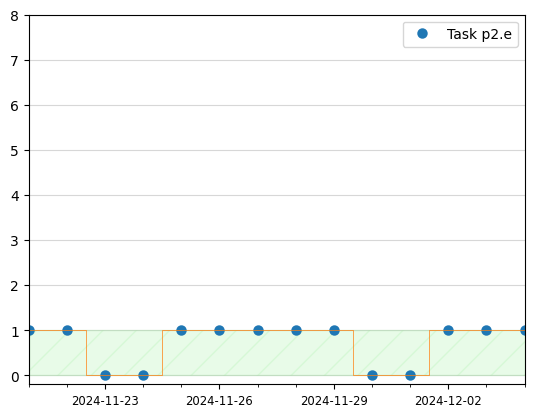

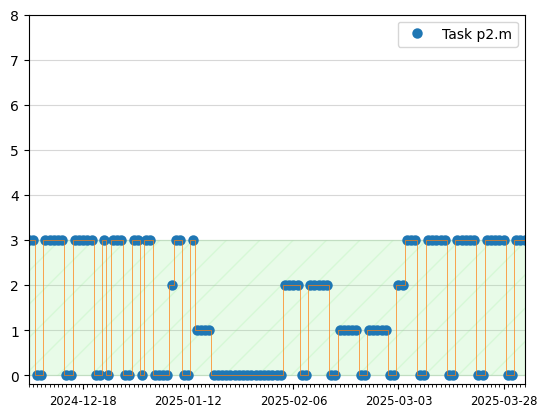

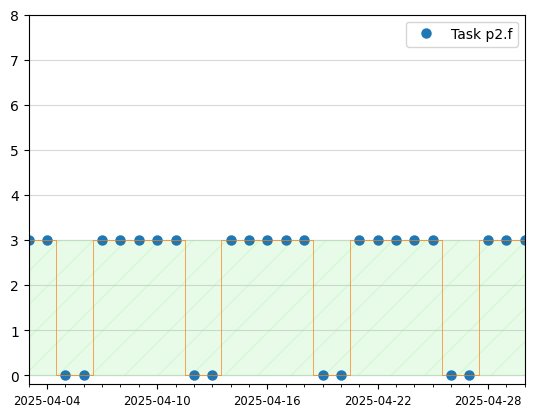

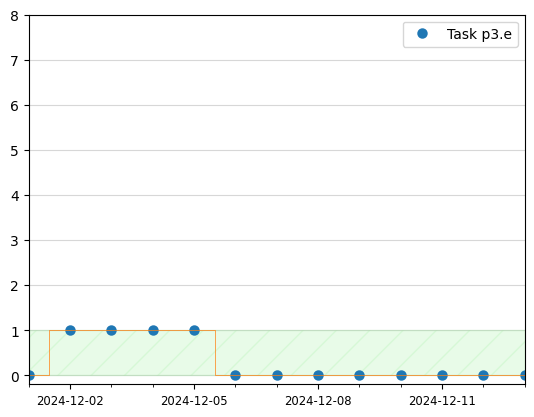

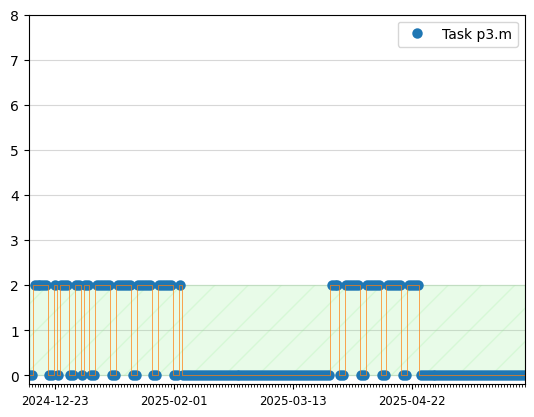

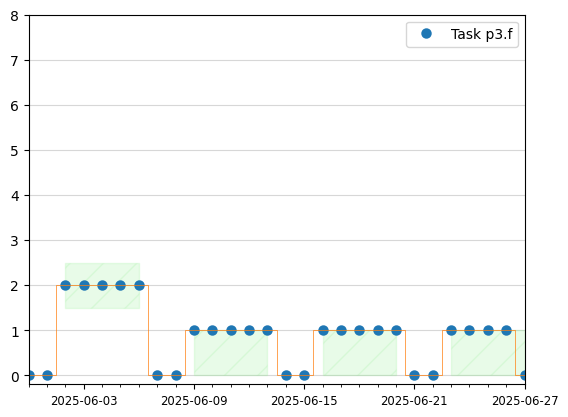

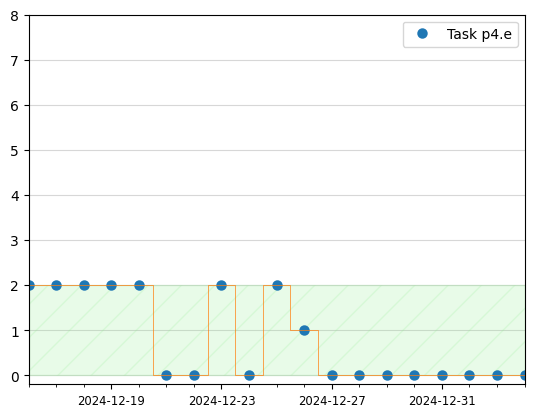

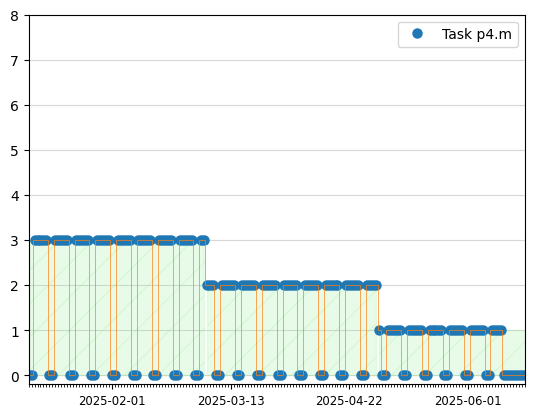

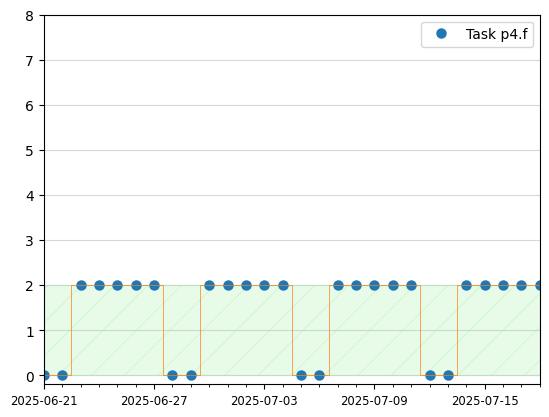

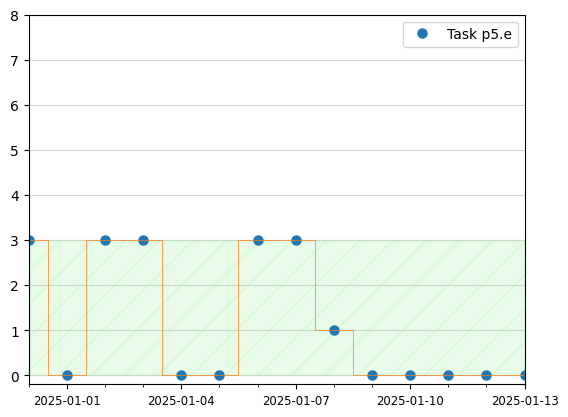

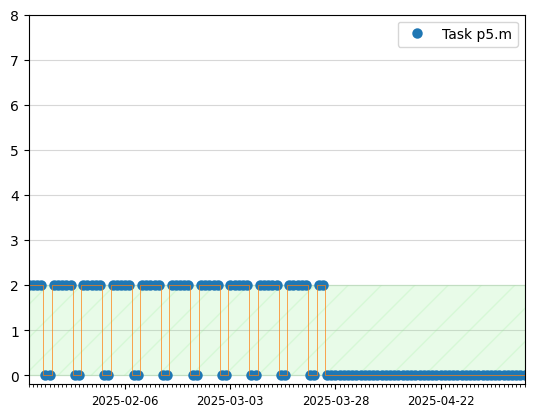

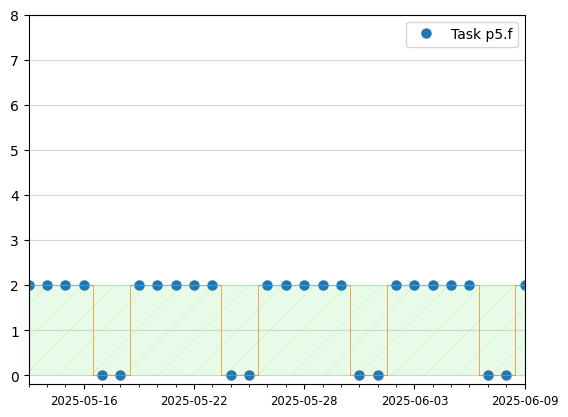

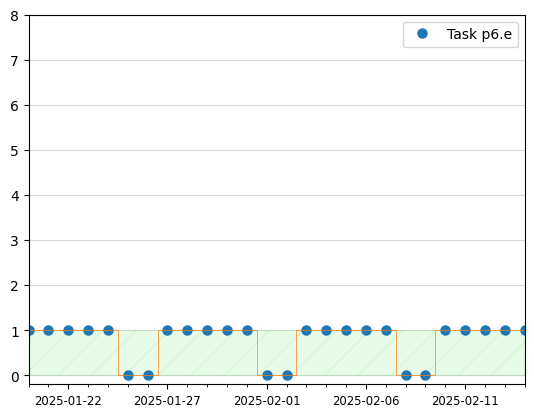

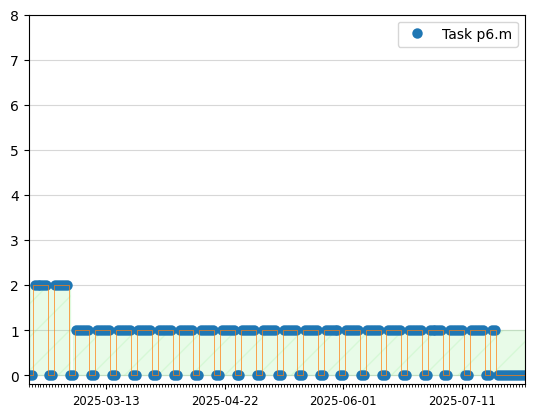

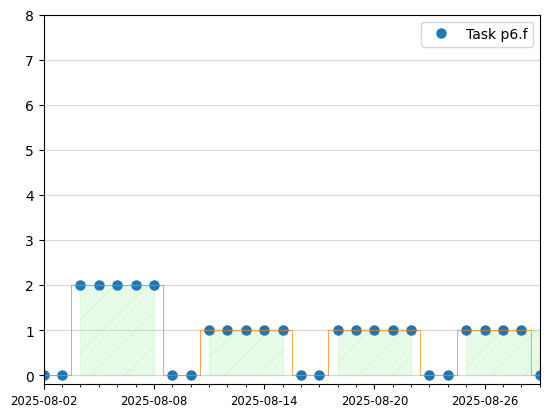

In [137]:
# task = df_tasks[ df_tasks["Name"] == "p3.f" ]
# print(task)
for idx in df_tasks.index:
    print(df_tasks.at[idx,"Name"])
    plot_task_bounds(df_tasks.at[idx,"Name"], df_tasks.at[idx,"Start day"], df_tasks.at[idx,"End day"])